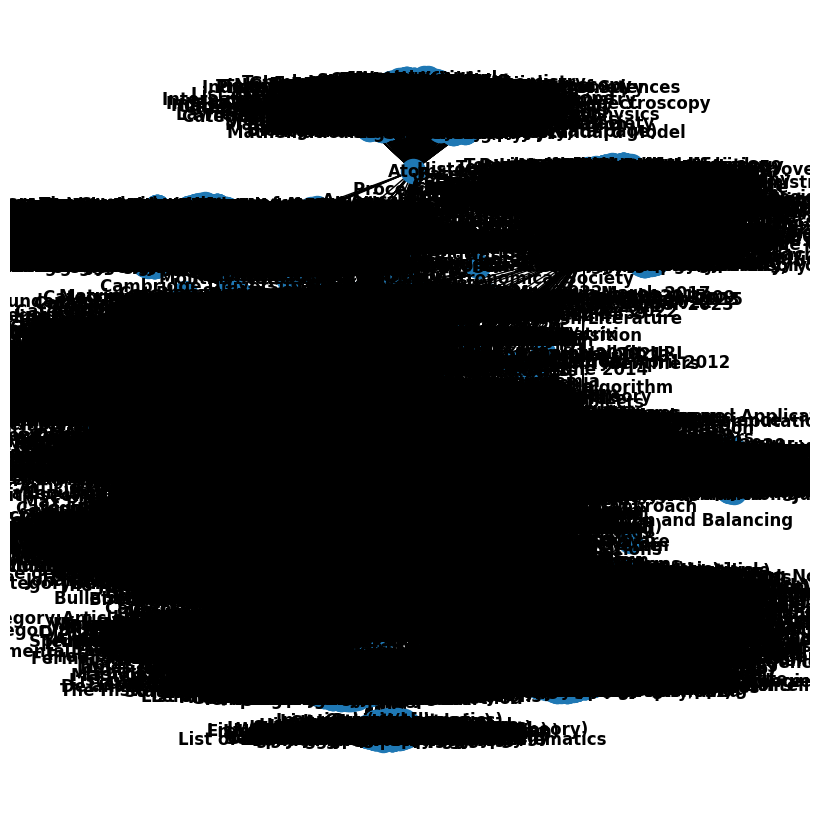

In [8]:
import wikipediaapi
import networkx as nx
import matplotlib.pyplot as plt

wiki_wiki = wikipediaapi.Wikipedia(extract_format=wikipediaapi.ExtractFormat.WIKI, user_agent='Your_User_Agent_String_Here')

def fetch_wikipedia_data(article_title):
    page = wiki_wiki.page(article_title)
    if page.exists():
        return page.text
    else:
        print(f"Page '{article_title}' does not exist.")

def construct_wikipedia_graph(seed_article, depth=1, max_nodes=50):
    visited = set()
    graph = nx.Graph()
    queue = [(seed_article, 0)]

    while queue:
        current_article, current_depth = queue.pop(0)
        visited.add(current_article)

        if current_depth < depth:
            try:
                page = wiki_wiki.page(current_article)
                links = page.links
                for title in sorted(links.keys()):
                    if len(visited) < max_nodes and title not in visited:
                        graph.add_edge(current_article, title)
                        queue.append((title, current_depth + 1))
            except wikipediaapi.WikipediaException as e:
                print(f"Error: {e}")

    return graph

seed_article = 'Graph_theory' 
wiki_data = fetch_wikipedia_data(seed_article)
graph = construct_wikipedia_graph(seed_article, depth=2, max_nodes=50)

# plt.figure(figsize=(8, 8))
# nx.draw(graph, with_labels=True, font_weight='bold')
# plt.show()


In [20]:
import networkx as nx
from py2neo import Graph, Node, Relationship

# Example NetworkX graph creation (Replace this with your actual NetworkX graph)
# graph = nx.Graph()
# graph.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (4, 5)])

# Connect to your Neo4j database (Replace with your Neo4j database credentials)
uri = "bolt://localhost:7687"  # Replace with your Neo4j URI
username = "neo4j"  # Replace with your Neo4j username
password = "your_password"  # Replace with your Neo4j password
graph_db = Graph(uri)

# Iterate through the NetworkX graph nodes and create corresponding nodes in Neo4j
for node_id in graph.nodes():
    node = Node("NodeLabel", id=node_id)  # Replace "NodeLabel" with your node label
    graph_db.create(node)

# Iterate through the NetworkX graph edges and create corresponding relationships in Neo4j
for source, target in graph.edges():
    source_node = graph_db.nodes.match("NodeLabel", id=source).first()
    target_node = graph_db.nodes.match("NodeLabel", id=target).first()
    graph_db.create(relationship := Relationship(source_node, "RELATED_TO", target_node))  # Replace "RELATED_TO" with your relationship type

print("Graph imported into Neo4j.")


Graph imported into Neo4j.


In [7]:
import wikipediaapi

# Initialize Wikipedia API
wiki_wiki = wikipediaapi.Wikipedia(extract_format=wikipediaapi.ExtractFormat.WIKI, user_agent='Your_User_Agent_String_Here')

# Function to fetch categories of a Wikipedia page
def get_page_categories(page_title):
    page = wiki_wiki.page(page_title)
    if page.exists():
        categories = [cat.title for cat in page.categories.keys()]
        return categories
    else:
        print(f"Page '{page_title}' does not exist.")

# Get categories for a specific Wikipedia page
page_title = 'Vladimir Putin'  # Replace with the desired page title
page_categories = get_page_categories(page_title)

if page_categories:
    print(f"Categories for '{page_title}':")
    # print(page_categories)
    for category in page_categories:
        # print(category)
        print(category())
else:
    print(f"Page '{page_title}' does not have categories.")


Categories for 'Vladimir Putin':
Category:1952 Births
Category:1St Class Active State Councillors Of The Russian Federation
Category:2003 Tuzla Island Conflict
Category:20Th-Century Eastern Orthodox Christians
Category:20Th-Century Russian Politicians
Category:20Th-Century Presidents Of Russia
Category:21St-Century Eastern Orthodox Christians
Category:21St-Century Russian Politicians
Category:Acting Presidents Of Russia
Category:All Articles Lacking Reliable References
Category:All Articles With Dead External Links
Category:All Articles With Unsourced Statements
Category:Anti-Americanism
Category:Anti-Ukrainian Sentiment In Russia
Category:Anti-Western Sentiment
Category:Articles Containing Russian-Language Text
Category:Articles Containing Video Clips
Category:Articles Lacking Reliable References From February 2023
Category:Articles That May Be Too Long From September 2023
Category:Articles With Bibsys Identifiers
Category:Articles With Bne Identifiers
Category:Articles With Bnf Ident

Processing...
Done!


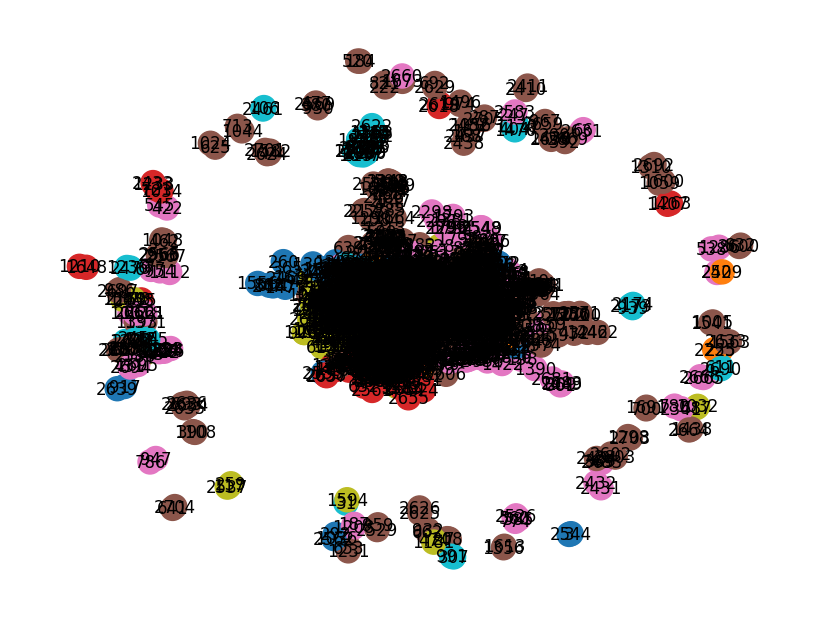

In [8]:
import torch
from torch_geometric.datasets import Planetoid
import networkx as nx
import matplotlib.pyplot as plt

dataset = Planetoid(root='data', name='Cora')

data = dataset[0]
G = nx.Graph()
for i in range(data.num_nodes):
    G.add_node(i, label=data.y[i].item())

edges = data.edge_index.t().tolist()
G.add_edges_from(edges)
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  
node_labels = {i: data.y[i].item() for i in range(data.num_nodes)}
nx.draw(G, pos, with_labels=True, node_color=data.y, cmap=plt.cm.tab10)
plt.show()


In [14]:
import wikipediaapi
from tqdm import tqdm
from py2neo import Graph, Node, Relationship

wiki_wiki = wikipediaapi.Wikipedia(extract_format=wikipediaapi.ExtractFormat.WIKI, user_agent='Your_User_Agent_String_Here')

graph = Graph("bolt://localhost:7687", auth=("neo4j", "your_password"))

def fetch_and_insert(page_title, depth_limit=3, current_depth=0):
    if current_depth > depth_limit:
        return

    page = wiki_wiki.page(page_title)
    article_node = Node("Article", title=page.title, summary=page.summary)
    graph.create(article_node)

    for category in tqdm(page.categories.keys()):
        category_node = Node("Category", name=category)
        graph.create(category_node)
        rel = Relationship(article_node, "BELONGS_TO", category_node)
        graph.create(rel)

    for link_title in tqdm(page.links.keys()):
        linked_page = wiki_wiki.page(link_title)
        linked_article_node = Node("Article", title=linked_page.title, summary=linked_page.summary)
        graph.create(linked_article_node)
        rel = Relationship(article_node, "LINKS_TO", linked_article_node)
        graph.create(rel)

        fetch_and_insert(linked_page.title, depth_limit, current_depth + 1)

fetch_and_insert("Abstract algebra")  

print("Data inserted into Neo4j.")


100%|██████████| 12/12 [00:00<00:00, 115.93it/s]

100%|██████████| 7/7 [00:00<00:00, 80.35it/s]







100%|██████████| 32/32 [00:00<00:00, 92.11it/s] 


















































































































































































































































































































































































































































































































































































































































































































































































































































































KeyboardInterrupt: 

In [15]:
import wikipediaapi
import networkx as nx


def fetch_wikipedia_links(page_title):
    wiki_wiki = wikipediaapi.Wikipedia('en')
    page = wiki_wiki.page(page_title)

    links = []
    if page.exists():
        for link in page.links:
            links.append(link)
    
    return links

def build_wikipedia_graph(start_page, depth_limit):
    G = nx.DiGraph()
    queue = [(start_page, 0)]

    while queue:
        current_page, depth = queue.pop(0)
        if depth <= depth_limit:
            if current_page not in G.nodes:
                G.add_node(current_page, category=current_page.categories)

                links = fetch_wikipedia_links(current_page)
                for link in links:
                    G.add_node(link, category=link.categories)
                    G.add_edge(current_page, link)
                    queue.append((link, depth + 1))
    
    return G

start_page = 'Graph_theory'  
max_depth = 2  

wiki_graph = build_wikipedia_graph(start_page, max_depth)

nx.write_gexf(wiki_graph, "wikipedia_graph.gexf")


AttributeError: 'str' object has no attribute 'categories'